In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

In [3]:
# Load Plant_1_Generation_Data.csv into a pandas DataFrame
import os

# Try to find the file in common locations
file_path = 'Plant_1_Generation_Data.csv'
possible_paths = [
    file_path,
    os.path.join(os.getcwd(), file_path),
    os.path.join(os.path.expanduser('~'), 'Downloads', file_path),
]

found = False
for path in possible_paths:
    if os.path.exists(path):
        plant1_gen_df = pd.read_csv(path)
        found = True
        print(f"File loaded from: {path}")
        break

if not found:
    print(f"WARNING: {file_path} not found in any of these locations:")
    for path in possible_paths:
        print(f"  - {path}")
    print("\nAvailable files in current directory:")
    for file in os.listdir('.'):
        print(f"  - {file}")
    print("\nPlease ensure Plant_1_Generation_Data.csv is in the same directory as this notebook.")
    print("Using weather_data_Gandikotta.csv as fallback for demonstration.")
    
    # Try to load the weather data as fallback
    if os.path.exists('weather_data_Gandikotta.csv'):
        plant1_gen_df = pd.read_csv('weather_data_Gandikotta.csv')
        print(f"Loaded weather_data_Gandikotta.csv as fallback")
    else:
        # Create an empty DataFrame to prevent NameError in subsequent cells
        plant1_gen_df = pd.DataFrame()
        print("No data file found. Created empty DataFrame.")
else:
    # Display the first 5 rows of the DataFrame
    display(plant1_gen_df.tail())
    
    # Display the data types of each column
    display(plant1_gen_df.info())

# Display the first few rows regardless
if not plant1_gen_df.empty:
    print("\nDataFrame loaded successfully!")
    print(f"Shape: {plant1_gen_df.shape}")
    display(plant1_gen_df.head())

File loaded from: Plant_1_Generation_Data.csv


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0
68777,17-06-2020 23:45,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


None


DataFrame loaded successfully!
Shape: (68778, 7)


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
# Remove the 'PLANT_ID' column if it exists
if 'PLANT_ID' in plant1_gen_df.columns:
    plant1_gen_df = plant1_gen_df.drop('PLANT_ID', axis=1)
    print("Dropped PLANT_ID column")
else:
    print("PLANT_ID column not found in dataset")

# Display descriptive statistics of the DataFrame
display(plant1_gen_df.describe())

Dropped PLANT_ID column


,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,3147.426211,307.802752,3295.968737,6.978712e+06
std,4036.457169,394.396439,3145.178309,4.162720e+05
min,0.000000,0.000000,0.000000,6.183645e+06
25%,0.000000,0.000000,0.000000,6.512003e+06
50%,429.000000,41.493750,2658.714286,7.146685e+06
75%,6366.964286,623.618750,6274.000000,7.268706e+06
max,14471.125000,1410.950000,9163.000000,7.846821e+06


In [28]:
# Check for missing values
display(plant1_gen_df.isnull().sum())

DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [29]:
# Check for duplicate rows
duplicates = plant1_gen_df.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


OUTLIERS DETECTION


In [30]:
# Get numerical columns from the dataframe
numerical_cols = plant1_gen_df.select_dtypes(include=['number']).columns.tolist()
print(f"Numerical columns found: {numerical_cols}")

outliers_count = {}

for col in numerical_cols:
    Q1 = plant1_gen_df[col].quantile(0.25)
    Q3 = plant1_gen_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = plant1_gen_df[(plant1_gen_df[col] < lower_bound) | (plant1_gen_df[col] > upper_bound)]
    outliers_count[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers found")

print("\nOutliers summary:")
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")

Numerical columns found: ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
DC_POWER: 0 outliers found
AC_POWER: 0 outliers found
DAILY_YIELD: 0 outliers found
TOTAL_YIELD: 0 outliers found

Outliers summary:
DC_POWER: 0 outliers
AC_POWER: 0 outliers
DAILY_YIELD: 0 outliers
TOTAL_YIELD: 0 outliers


In [5]:
# Check if SOURCE_KEY column exists
if 'SOURCE_KEY' in plant1_gen_df.columns:
    unique_source_keys = plant1_gen_df['SOURCE_KEY'].unique()
    source_key_dataframes = {}

    for source_key in unique_source_keys:
        source_key_dataframes[source_key] = plant1_gen_df[plant1_gen_df['SOURCE_KEY'] == source_key].copy()

    # Display the number of dataframes created and the first few rows of one of the dataframes as an example
    print(f"Number of separate dataframes created: {len(source_key_dataframes)}")
    if len(source_key_dataframes) > 0:
        first_key = list(source_key_dataframes.keys())[0]
        print(f"\nFirst few rows of the dataframe for {first_key}:")
        display(source_key_dataframes[first_key].head())
else:
    print("SOURCE_KEY column not found in dataset")
    print(f"Available columns: {plant1_gen_df.columns.tolist()}")
    # Create a dummy dictionary to prevent errors in subsequent cells
    source_key_dataframes = {}

Number of separate dataframes created: 22

First few rows of the dataframe for 1BY6WEcLGh8j5v7:


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
21,15-05-2020 00:15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
42,15-05-2020 00:30,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
63,15-05-2020 00:45,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
84,15-05-2020 01:00,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0


this step is made up to see if the different plants have the same observation numbers or not

In [32]:
for source_key, df in source_key_dataframes.items():
    print(f"Source Key: {source_key}")
    print(f"Number of rows: {len(df)}")
    print("Missing values per column:")
    display(df.isnull().sum())
    print("-" * 30)

Source Key: 1BY6WEcLGh8j5v7
Number of rows: 3154
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: 1IF53ai7Xc0U56Y
Number of rows: 3119
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: 3PZuoBAID5Wc2HD
Number of rows: 3118
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: 7JYdWkrLSPkdwr4
Number of rows: 3133
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: McdE0feGgRqW7Ca
Number of rows: 3124
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: VHMLBKoKgIrUVDU
Number of rows: 3133
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: WRmjgnKYAwPKWDb
Number of rows: 3118
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: ZnxXDlPa8U1GXgE
Number of rows: 3130
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: ZoEaEvLYb1n2sOq
Number of rows: 3123
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: adLQvlD726eNBSB
Number of rows: 3119
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: bvBOhCH3iADSZry
Number of rows: 3155
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: iCRJl6heRkivqQ3
Number of rows: 3125
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: ih0vzX44oOqAx2f
Number of rows: 3130
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: pkci93gMrogZuBj
Number of rows: 3125
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: rGa61gmuvPhdLxV
Number of rows: 3124
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: sjndEbLyjtCKgGv
Number of rows: 3124
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: uHbuxQJl8lW7ozc
Number of rows: 3125
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: wCURE6d3bPkepu2
Number of rows: 3126
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: z9Y9gH1T5YWrNuG
Number of rows: 3126
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: zBIq5rxdHJRwDNY
Number of rows: 3119
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: zVJPv84UY57bAof
Number of rows: 3124
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------
Source Key: YxYtjZvoooNbGkE
Number of rows: 3104
Missing values per column:


DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

------------------------------


In [33]:
max_rows = 0
source_key_with_max_rows = None

for source_key, df in source_key_dataframes.items():
    if len(df) > max_rows:
        max_rows = len(df)
        source_key_with_max_rows = source_key

print(f"Maximum number of rows: {max_rows}")
print(f"Source key with maximum rows: {source_key_with_max_rows}")

# Identify source keys with fewer rows than the maximum
source_keys_to_consider = [source_key for source_key, df in source_key_dataframes.items() if len(df) < max_rows]

print(f"\nSource keys with fewer rows than the maximum ({max_rows}):")
display(source_keys_to_consider)

Maximum number of rows: 3155
Source key with maximum rows: bvBOhCH3iADSZry

Source keys with fewer rows than the maximum (3155):


['1BY6WEcLGh8j5v7',
 '1IF53ai7Xc0U56Y',
 '3PZuoBAID5Wc2HD',
 '7JYdWkrLSPkdwr4',
 'McdE0feGgRqW7Ca',
 'VHMLBKoKgIrUVDU',
 'WRmjgnKYAwPKWDb',
 'ZnxXDlPa8U1GXgE',
 'ZoEaEvLYb1n2sOq',
 'adLQvlD726eNBSB',
 'iCRJl6heRkivqQ3',
 'ih0vzX44oOqAx2f',
 'pkci93gMrogZuBj',
 'rGa61gmuvPhdLxV',
 'sjndEbLyjtCKgGv',
 'uHbuxQJl8lW7ozc',
 'wCURE6d3bPkepu2',
 'z9Y9gH1T5YWrNuG',
 'zBIq5rxdHJRwDNY',
 'zVJPv84UY57bAof',
 'YxYtjZvoooNbGkE']


this indicates the possibiliy of missing observations for those source keys since theres no missing values





In [6]:
# Select the DataFrame for the source key with the maximum number of rows
source_key_with_max_rows = None
max_rows = 0

for source_key, df in source_key_dataframes.items():
    if len(df) > max_rows:
        max_rows = len(df)
        source_key_with_max_rows = source_key

selected_df_max_rows = source_key_dataframes[source_key_with_max_rows]

print(f"Selected source key with maximum rows: {source_key_with_max_rows}")
display(selected_df_max_rows.tail())

Selected source key with maximum rows: bvBOhCH3iADSZry


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68679,17-06-2020 22:45,bvBOhCH3iADSZry,0.0,0.0,5460.0,6539009.0
68701,17-06-2020 23:00,bvBOhCH3iADSZry,0.0,0.0,5460.0,6539009.0
68723,17-06-2020 23:15,bvBOhCH3iADSZry,0.0,0.0,5460.0,6539009.0
68745,17-06-2020 23:30,bvBOhCH3iADSZry,0.0,0.0,5460.0,6539009.0
68767,17-06-2020 23:45,bvBOhCH3iADSZry,0.0,0.0,5460.0,6539009.0


we can say this is the most trusted plant now and we can finish the data preprocessing on it

In [35]:
# Check for duplicate rows in the selected DataFrame
duplicates_selected_df = selected_df_max_rows.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows in the selected DataFrame: {duplicates_selected_df}")

Number of duplicate rows in the selected DataFrame: 0


In [7]:
# Convert 'DATE_TIME' column to datetime objects
selected_df_max_rows['DATE_TIME'] = pd.to_datetime(selected_df_max_rows['DATE_TIME'])

# Extract date and time into new columns
selected_df_max_rows['DATE'] = selected_df_max_rows['DATE_TIME'].dt.date
selected_df_max_rows['TIME'] = selected_df_max_rows['DATE_TIME'].dt.time

# Display descriptive statistics of the DataFrame
display(selected_df_max_rows.describe())



C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_30088\3142000425.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  selected_df_max_rows['DATE_TIME'] = pd.to_datetime(selected_df_max_rows['DATE_TIME'])


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,3155,3155.000000,3155.000000,3155.000000,3.155000e+03
mean,2020-06-01 06:48:06.846275840,2828.998291,276.778938,3146.858362,6.432819e+06
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6.316803e+06
25%,2020-05-23 23:07:30,0.000000,0.000000,0.267857,6.376772e+06
50%,2020-06-01 12:45:00,285.000000,27.514286,2896.142857,6.437096e+06
75%,2020-06-09 18:07:30,5708.562500,559.431250,5777.169643,6.493334e+06
max,2020-06-17 23:45:00,12976.000000,1265.157143,8131.000000,6.539009e+06
std,NaN,3698.531647,361.579929,2873.834378,6.578766e+04


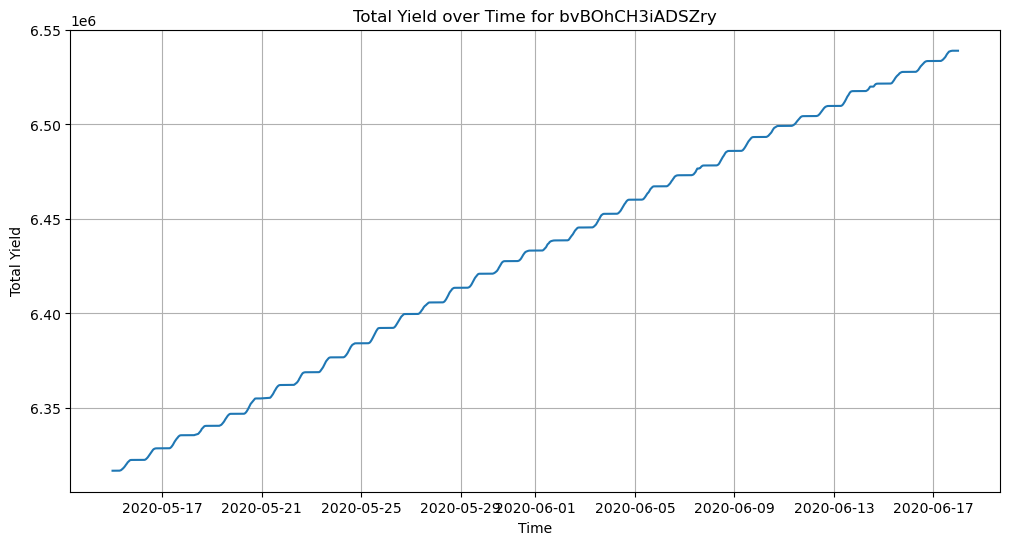

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(selected_df_max_rows['DATE_TIME'], selected_df_max_rows['TOTAL_YIELD'])
plt.title(f"Total Yield over Time for {source_key_with_max_rows}")
plt.xlabel("Time")
plt.ylabel("Total Yield")
plt.grid(True)
plt.show()

total yield is basically the value of the production since we installed / planted the solar pv so its normale it would be increasing

which actually does make sense since the season changes over months and the heat increases so the production augment over the time where summer is near

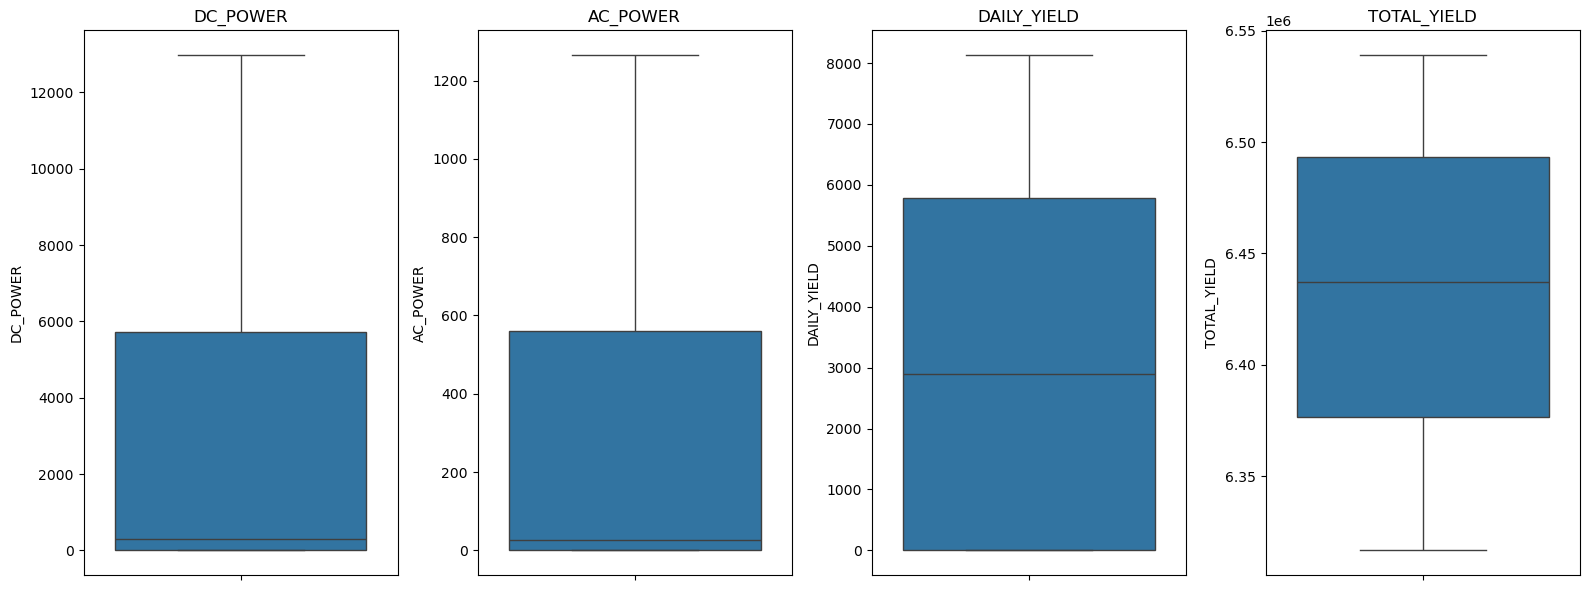

In [38]:
# Create boxplots for numerical columns to visualize outliers in a single figure
numerical_cols = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
num_cols = len(numerical_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(num_cols * 4, 6))

for i, col in enumerate(numerical_cols):
    sbn.boxplot(y=selected_df_max_rows[col], ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

no outliers which can feel odd sometimes and thats normale since we cant know if thats real data or generated

In [8]:
# Resample the DataFrame to hourly frequency, taking the mean of numerical columns
numerical_cols_for_resampling = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
hourly_df = selected_df_max_rows.resample('h', on='DATE_TIME')[numerical_cols_for_resampling].mean()

# Display the first few rows of the resampled DataFrame
display(hourly_df)
print(len(hourly_df))

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,
2020-05-15 00:00:00,0.0,0.0,0.0,6316803.0
2020-05-15 01:00:00,0.0,0.0,0.0,6316803.0
2020-05-15 02:00:00,0.0,0.0,0.0,6316803.0
2020-05-15 03:00:00,0.0,0.0,0.0,6316803.0
2020-05-15 04:00:00,0.0,0.0,0.0,6316803.0
...,...,...,...,...
2020-06-17 19:00:00,0.0,0.0,5460.0,6539009.0
2020-06-17 20:00:00,0.0,0.0,5460.0,6539009.0
2020-06-17 21:00:00,0.0,0.0,5460.0,6539009.0


816


In [9]:
# Check for duplicate rows in hourly_df
hourly_duplicates = hourly_df.duplicated().sum()
print(f"Number of duplicate rows in hourly_df: {hourly_duplicates}")

# Check for missing values in hourly_df
print("\nMissing values in hourly_df per column:")
display(hourly_df.isnull().sum())

Number of duplicate rows in hourly_df: 287

Missing values in hourly_df per column:


DC_POWER       20
AC_POWER       20
DAILY_YIELD    20
TOTAL_YIELD    20
dtype: int64

extracting the date and time components from the 'DATE_TIME' index for better visibility

In [10]:
from datetime import time

def is_closer_to_noon(time_obj: time) -> bool:
    """
    Determines if a time object is closer to noon (12:00) or midnight (00:00).

    Args:
        time_obj: A datetime.time object.

    Returns:
        True if the time is closer to noon (or exactly at noon), False otherwise.
    """
    hour = time_obj.hour
    # Calculate the difference in hours to noon (12)
    diff_to_noon = abs(hour - 12)
    # Calculate the difference in hours to midnight (0 or 24)
    # We need to consider the case where the hour is past noon and closer to midnight of the next day
    diff_to_midnight = min(abs(hour - 0), abs(hour - 24))

    return diff_to_noon <= diff_to_midnight


In [15]:
# Identify numerical columns with missing values
numerical_cols_with_missing = hourly_df.select_dtypes(include=np.number).columns[hourly_df.select_dtypes(include=np.number).isnull().any()]

# Calculate mean and minimum for each identified column
mean_values = hourly_df[numerical_cols_with_missing].mean().to_dict()
min_values = hourly_df[numerical_cols_with_missing].min().to_dict()

# Display the calculated values
print("Mean values for columns with missing data:")
display(mean_values)

print("\nMinimum values for columns with missing data:")
display(min_values)

Mean values for columns with missing data:


{'DC_POWER': 2826.51852006168,
 'AC_POWER': 276.5347327789884,
 'DAILY_YIELD': 3143.9667724747205,
 'TOTAL_YIELD': 6432325.511731366}


Minimum values for columns with missing data:


{'DC_POWER': 0.0,
 'AC_POWER': 0.0,
 'DAILY_YIELD': 0.0,
 'TOTAL_YIELD': 6316803.0}

In [16]:
# Extract date and time from the index and add them as new columns
hourly_df['DATE'] = hourly_df.index.date
hourly_df['TIME'] = hourly_df.index.time

# Identify rows with any missing values in the numerical columns with missing data
rows_with_missing = hourly_df[hourly_df[numerical_cols_with_missing].isnull().any(axis=1)]

# Iterate through the identified rows
for index, row in rows_with_missing.iterrows():
    current_time = row['TIME']

    # Determine if the time is closer to noon or midnight
    closer_to_noon = is_closer_to_noon(current_time)

    # Iterate through numerical columns with missing values
    for col in numerical_cols_with_missing:
        # Check if the value in the current row and column is missing
        if pd.isnull(row[col]):
            # Impute based on time proximity
            if closer_to_noon:
                hourly_df.loc[index, col] = mean_values[col]
            else:
                hourly_df.loc[index, col] = min_values[col]

# Check if missing values have been imputed
print("Missing values in hourly_df after imputation:")
display(hourly_df.isnull().sum())

Missing values in hourly_df after imputation:


DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
DATE           0
TIME           0
dtype: int64

In [12]:
# Check for missing values in hourly_df after imputation
print("Missing values in hourly_df after imputation:")
display(hourly_df.isnull().sum())

Missing values in hourly_df after imputation:


DC_POWER       20
AC_POWER       20
DAILY_YIELD    20
TOTAL_YIELD    20
DATE            0
TIME            0
dtype: int64

due to weather api limitations
( we cant generate weather with a seasonality of 15 min like the data we have so we will delete the lines of this data in order to have the same timestamp of the weather data and then merge it together)

In [13]:
# Load weather_data_india.csv into a pandas DataFrame
import os

# Try to find the file in common locations
file_path = 'weather_data_Gandikotta.csv'
possible_paths = [
    file_path,
    os.path.join(os.getcwd(), file_path),
    os.path.join(os.path.expanduser('~'), 'Downloads', file_path),
]

found = False
for path in possible_paths:
    if os.path.exists(path):
        weather_df = pd.read_csv(path)
        found = True
        print(f"File loaded from: {path}")
        break

if not found:
    print(f"ERROR: {file_path} not found in any of these locations:")
    for path in possible_paths:
        print(f"  - {path}")
    print("\nPlease ensure weather_data_Gandikotta.csv is in the same directory as this notebook.")
else:
    # Display the first few rows of the DataFrame
    display(weather_df.head())
    
    # Display the data types of each column
    display(weather_df.info())
    print(len(weather_df))

File loaded from: weather_data_Gandikotta.csv


,temp,humidity,dew,precip,pressure,windgust,windspeed,cloudcover,timestamp
0,28.5,79.46,24.6,0.0,1009.0,24.5,9.4,15.7,2020-05-15 00:00:00
1,28.2,80.37,24.5,0.0,1008.0,19.4,4.7,12.6,2020-05-15 01:00:00
2,26.8,86.72,24.4,0.0,1007.0,12.6,4.3,6.3,2020-05-15 02:00:00
3,27.1,84.69,24.3,0.0,1007.0,8.6,2.5,4.5,2020-05-15 03:00:00
4,25.6,89.80,23.8,0.0,1007.0,6.8,3.6,4.0,2020-05-15 04:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        816 non-null    float64
 1   humidity    816 non-null    float64
 2   dew         816 non-null    float64
 3   precip      816 non-null    float64
 4   pressure    816 non-null    float64
 5   windgust    816 non-null    float64
 6   windspeed   816 non-null    float64
 7   cloudcover  816 non-null    float64
 8   timestamp   816 non-null    object 
dtypes: float64(8), object(1)
memory usage: 57.5+ KB


None

816


evaluating features normality

In [46]:
from scipy.stats import skew, kurtosis, shapiro

# Select numerical columns for statistical tests
numerical_cols_for_stats = plant1_gen_df.select_dtypes(include=np.number).columns

# Calculate skewness and kurtosis
skewness_values = skew(plant1_gen_df[numerical_cols_for_stats])
kurtosis_values = kurtosis(plant1_gen_df[numerical_cols_for_stats])

# Display skewness and kurtosis
print("Skewness of numerical features:")
for col, value in zip(numerical_cols_for_stats, skewness_values):
    print(f"{col}: {value:.4f}")

print("\nKurtosis of numerical features:")
for col, value in zip(numerical_cols_for_stats, kurtosis_values):
    print(f"{col}: {value:.4f}")

Skewness of numerical features:
DC_POWER: 0.9584
AC_POWER: 0.9534
DAILY_YIELD: 0.2757
TOTAL_YIELD: -0.4183

Kurtosis of numerical features:
DC_POWER: -0.4885
AC_POWER: -0.5026
DAILY_YIELD: -1.5366
TOTAL_YIELD: -1.0070


In [47]:
from scipy.stats import shapiro
# Perform Shapiro-Wilk test for normality
print("\nShapiro-Wilk test for normality:")
for col in numerical_cols_for_stats:
    stat, p_value = shapiro(plant1_gen_df[col])
    print(f"{col}: Statistics={stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print("  (Likely follows a normal distribution)")
    else:
        print("  (Likely does not follow a normal distribution)")


Shapiro-Wilk test for normality:
DC_POWER: Statistics=0.7738, p-value=0.0000
  (Likely does not follow a normal distribution)
AC_POWER: Statistics=0.7738, p-value=0.0000
  (Likely does not follow a normal distribution)
DAILY_YIELD: Statistics=0.8429, p-value=0.0000
  (Likely does not follow a normal distribution)
TOTAL_YIELD: Statistics=0.8947, p-value=0.0000
  (Likely does not follow a normal distribution)
AC_POWER: Statistics=0.7738, p-value=0.0000
  (Likely does not follow a normal distribution)
DAILY_YIELD: Statistics=0.8429, p-value=0.0000
  (Likely does not follow a normal distribution)
TOTAL_YIELD: Statistics=0.8947, p-value=0.0000
  (Likely does not follow a normal distribution)


c:\Users\GIGABYTE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68778.
  res = hypotest_fun_out(*samples, **kwds)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        816 non-null    float64
 1   humidity    816 non-null    float64
 2   dew         816 non-null    float64
 3   precip      816 non-null    float64
 4   pressure    816 non-null    float64
 5   windgust    816 non-null    float64
 6   windspeed   816 non-null    float64
 7   cloudcover  816 non-null    float64
 8   timestamp   816 non-null    object 
dtypes: float64(8), object(1)
memory usage: 57.5+ KB


None

,temp,humidity,dew,precip,pressure,windgust,windspeed,cloudcover
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,31.770098,60.130662,22.431373,0.099387,1004.637377,27.803922,10.417525,73.757475
std,3.782412,15.985910,2.116768,0.507139,2.742873,12.880669,6.187407,33.963722
min,24.200000,23.870000,15.100000,0.000000,994.300000,4.000000,0.000000,0.000000
25%,28.900000,47.880000,21.400000,0.000000,1003.000000,16.200000,5.400000,45.750000
50%,31.100000,60.355000,22.600000,0.000000,1005.000000,27.400000,9.400000,97.100000
75%,34.300000,71.667500,23.800000,0.000000,1007.000000,38.200000,15.100000,100.000000
max,42.700000,95.340000,27.200000,6.700000,1011.000000,59.400000,25.600000,100.000000


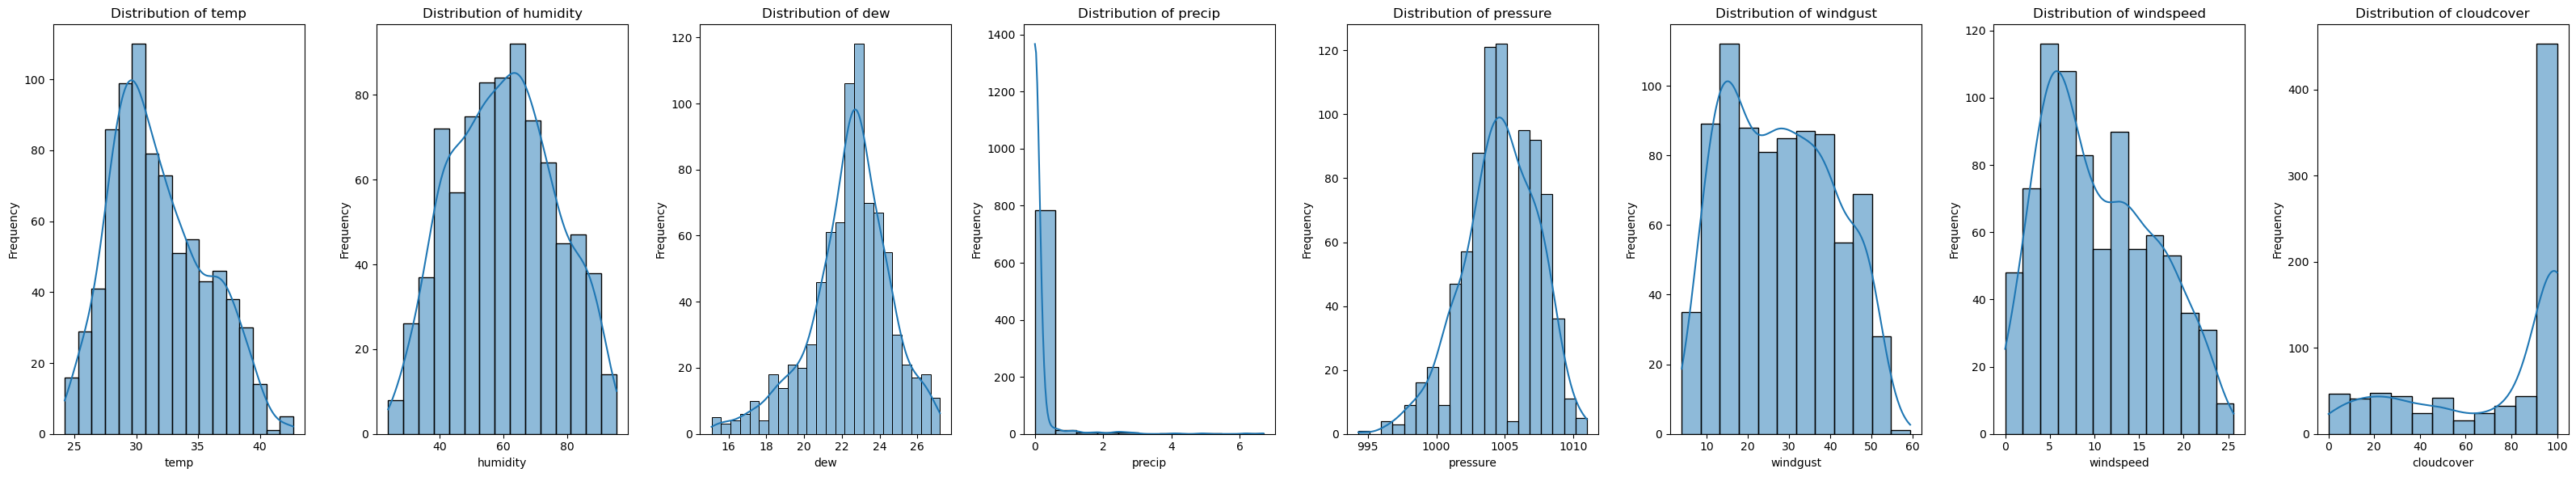

In [48]:
# Display the data types of each column
display(weather_df.info())

# Display descriptive statistics of the numerical columns
display(weather_df.describe())

# Create histograms for numerical columns
numerical_cols_weather = weather_df.select_dtypes(include=np.number).columns
num_cols = len(numerical_cols_weather)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(num_cols * 4, 6))

for i, col in enumerate(numerical_cols_weather):
    sbn.histplot(weather_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Select the numerical columns from the merged DataFrame
numerical_cols_merged = merged_df.select_dtypes(include=np.number).columns
numerical_data = merged_df[numerical_cols_merged]

# Initialize the StandardScaler
scaler_standard = StandardScaler()

# Apply Standardization
scaled_data_standard = scaler_standard.fit_transform(numerical_data)
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=numerical_cols_merged, index=merged_df.index)

print("Standardized Data (first 5 rows):")
display(scaled_df_standard.head())

# Initialize the RobustScaler
scaler_robust = RobustScaler()

# Apply Robust Scaling
scaled_data_robust = scaler_robust.fit_transform(numerical_data)
scaled_df_robust = pd.DataFrame(scaled_data_robust, columns=numerical_cols_merged, index=merged_df.index)

print("\nRobust Scaled Data (first 5 rows):")
display(scaled_df_robust.head())

Standardized Data (first 5 rows):


,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,temp,humidity,dew,precip,pressure,windgust,windspeed,cloudcover
0,-0.773288,-0.773746,-1.078726,-1.690691,-0.865084,1.209890,1.025128,-0.196097,1.591506,-0.256660,-0.164552,-1.710445
1,-0.773288,-0.773746,-1.078726,-1.690691,-0.944447,1.266850,0.977857,-0.196097,1.226701,-0.652845,-0.924625,-1.801775
2,-0.773288,-0.773746,-1.078726,-1.690691,-1.314808,1.664319,0.930586,-0.196097,0.861896,-1.181091,-0.989312,-1.987381
3,-0.773288,-0.773746,-1.078726,-1.690691,-1.235445,1.537254,0.883315,-0.196097,0.861896,-1.491825,-1.280404,-2.040411
4,-0.773288,-0.773746,-1.078726,-1.690691,-1.632261,1.857106,0.646961,-0.196097,0.861896,-1.631655,-1.102515,-2.055142



Robust Scaled Data (first 5 rows):


,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,temp,humidity,dew,precip,pressure,windgust,windspeed,cloudcover
0,-0.050059,-0.04946,-0.48379,-0.976634,-0.481481,0.803153,0.833333,0.0,1.00,-0.131818,0.000000,-1.500461
1,-0.050059,-0.04946,-0.48379,-0.976634,-0.537037,0.841408,0.791667,0.0,0.75,-0.363636,-0.484536,-1.557604
2,-0.050059,-0.04946,-0.48379,-0.976634,-0.796296,1.108355,0.750000,0.0,0.50,-0.672727,-0.525773,-1.673733
3,-0.050059,-0.04946,-0.48379,-0.976634,-0.740741,1.023016,0.708333,0.0,0.50,-0.854545,-0.711340,-1.706912
4,-0.050059,-0.04946,-0.48379,-0.976634,-1.018519,1.237835,0.500000,0.0,0.50,-0.936364,-0.597938,-1.716129


In [14]:
# Convert 'timestamp' column to datetime objects
weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'])

# Merge the dataframes
merged_df = pd.merge(hourly_df, weather_df, left_on='DATE_TIME', right_on='timestamp', how='inner')

# Drop the redundant 'timestamp' column
merged_df = merged_df.drop('timestamp', axis=1)

# Display the first few rows of the merged DataFrame
display(merged_df.head())

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME,temp,humidity,dew,precip,pressure,windgust,windspeed,cloudcover
0,0.0,0.0,0.0,6316803.0,2020-05-15,00:00:00,28.5,79.46,24.6,0.0,1009.0,24.5,9.4,15.7
1,0.0,0.0,0.0,6316803.0,2020-05-15,01:00:00,28.2,80.37,24.5,0.0,1008.0,19.4,4.7,12.6
2,0.0,0.0,0.0,6316803.0,2020-05-15,02:00:00,26.8,86.72,24.4,0.0,1007.0,12.6,4.3,6.3
3,0.0,0.0,0.0,6316803.0,2020-05-15,03:00:00,27.1,84.69,24.3,0.0,1007.0,8.6,2.5,4.5
4,0.0,0.0,0.0,6316803.0,2020-05-15,04:00:00,25.6,89.80,23.8,0.0,1007.0,6.8,3.6,4.0


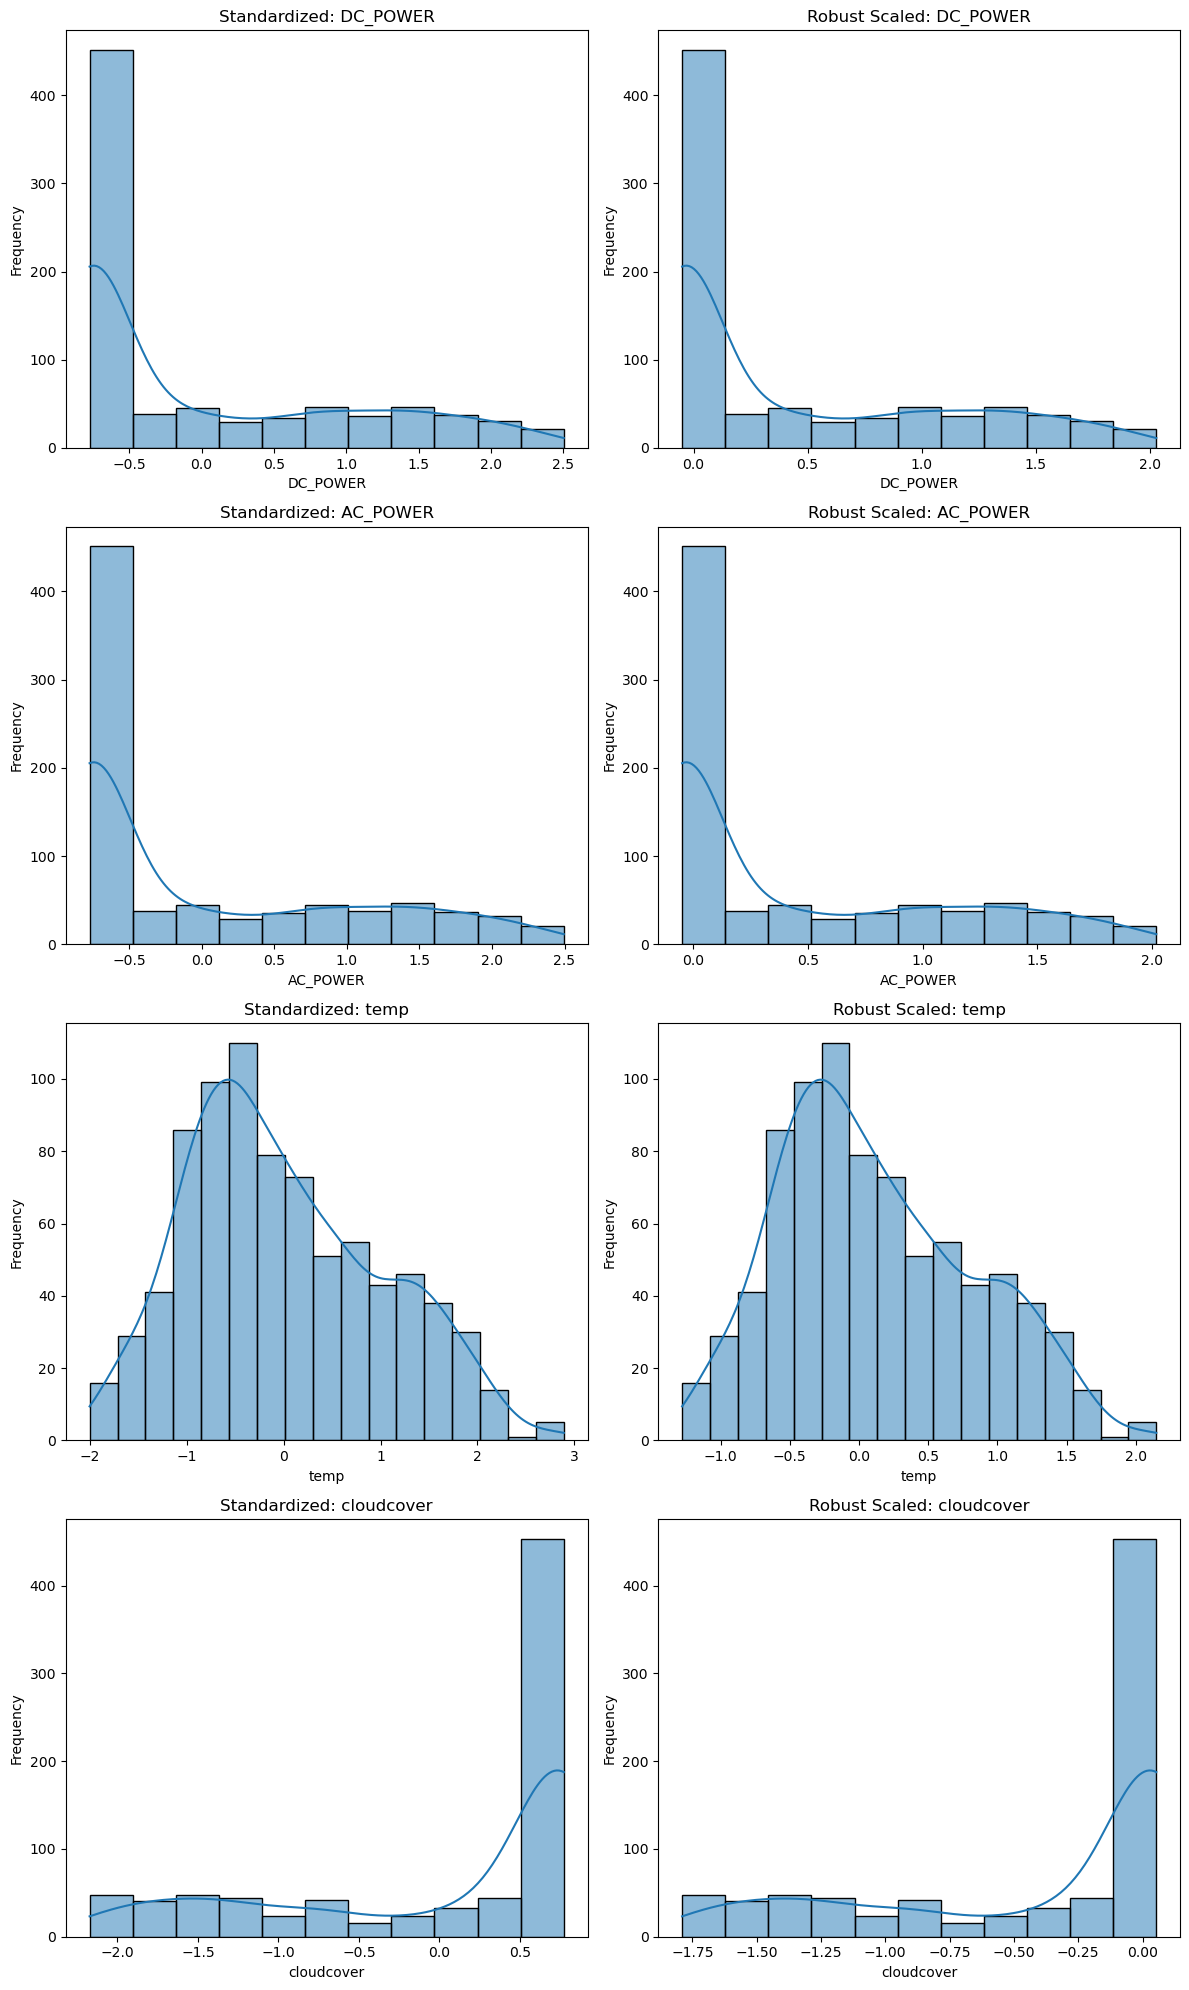

In [51]:
# Select a few numerical columns to visualize their distributions after scaling
cols_to_visualize = ['DC_POWER', 'AC_POWER', 'temp', 'cloudcover']

# Create subplots for comparison
fig, axes = plt.subplots(nrows=len(cols_to_visualize), ncols=2, figsize=(12, len(cols_to_visualize) * 5))

for i, col in enumerate(cols_to_visualize):
    # Plot histogram for Standardized data
    sbn.histplot(scaled_df_standard[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Standardized: {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Plot histogram for Robust Scaled data
    sbn.histplot(scaled_df_robust[col], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Robust Scaled: {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

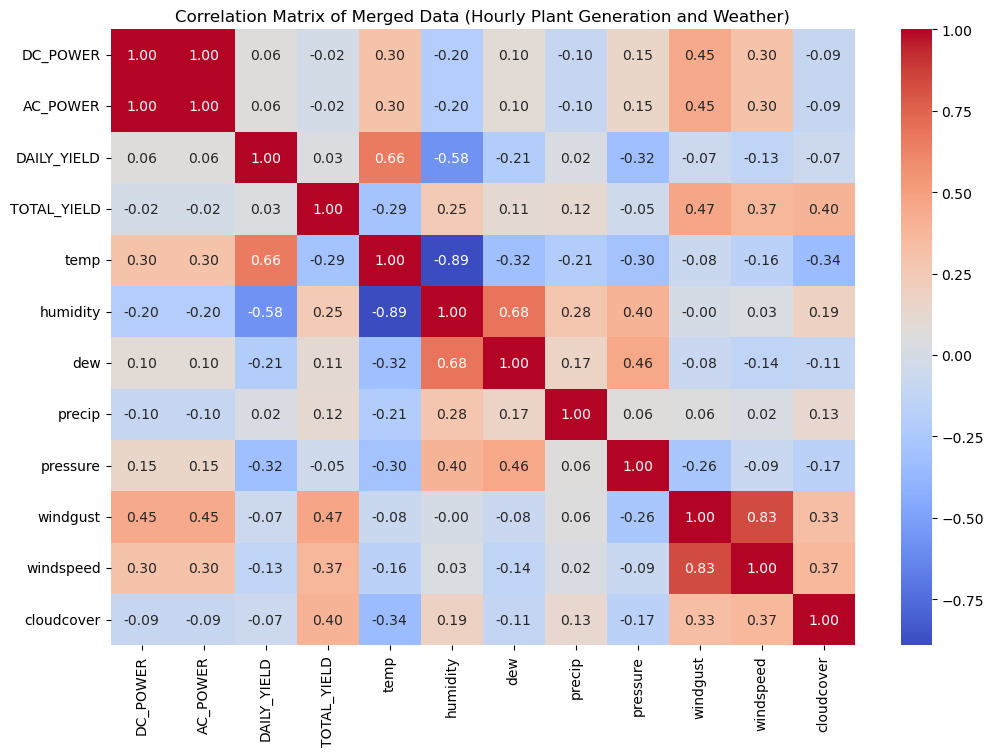

In [17]:
# Convert 'timestamp' column to datetime objects
weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'])

# Merge the dataframes
merged_df = pd.merge(hourly_df, weather_df, left_on='DATE_TIME', right_on='timestamp', how='inner')

# Drop the redundant 'timestamp' column
merged_df = merged_df.drop('timestamp', axis=1)

# Select only numerical columns for correlation calculation
numerical_merged_df = merged_df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_merged_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Merged Data (Hourly Plant Generation and Weather)')
plt.show()

Based on domain knowledge, identify likely influential weather features:
Temperature: Higher temperatures can sometimes reduce solar panel efficiency.
Cloud cover: Directly impacts the amount of sunlight reaching the panels, a primary driver of solar power generation.
Precipitation: Rain can reduce sunlight and potentially clean panels, but heavy rain/storms can significantly reduce output.
Humidity: Can indirectly affect temperature and cloud formation.
Wind speed/gust: Can cool panels (positive effect) or potentially cause damage (negative effect), generally less influential than sunlight/temperature.
Pressure: Generally has less direct impact on solar power generation compared to other weather parameters.


In [53]:
influential_weather_features = [
    'temp',
    'cloudcover',
    'precip',
    'humidity'
]

print("Weather features likely to be influential on solar power output:")
for feature in influential_weather_features:
    print(f"- {feature}")

Weather features likely to be influential on solar power output:
- temp
- cloudcover
- precip
- humidity


In [29]:
display(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DC_POWER     816 non-null    float64
 1   AC_POWER     816 non-null    float64
 2   DAILY_YIELD  816 non-null    float64
 3   TOTAL_YIELD  816 non-null    float64
 4   DATE         816 non-null    object 
 5   TIME         816 non-null    object 
 6   temp         816 non-null    float64
 7   humidity     816 non-null    float64
 8   dew          816 non-null    float64
 9   precip       816 non-null    float64
 10  pressure     816 non-null    float64
 11  windgust     816 non-null    float64
 12  windspeed    816 non-null    float64
 13  cloudcover   816 non-null    float64
dtypes: float64(12), object(2)
memory usage: 89.4+ KB


None

also  it's important to understand the difference between the columns. 'DAILY_YIELD' represents the cumulative energy produced by a source key throughout a single day, reset at midnight.

While 'DAILY_YIELD' is related to the power generation ('DC_POWER' and 'AC_POWER'), it's a cumulative value over a longer period (a day), whereas weather data is typically recorded at more frequent intervals (like a 15 min or hourly like in our case).

When we're trying to understand the instantaneous impact of weather conditions on solar power output, 'DC_POWER' or 'AC_POWER' are usually more appropriate target variables because they represent the power being generated at that specific moment in time when the weather data was recorded.

'DAILY_YIELD' is not necessarily an unnecessary feature; it's just a different type of metric. It can be useful for other analyses, such as understanding the total energy production over a day or comparing daily performance. However, for correlating with instantaneous weather conditions, 'DC_POWER' or 'AC_POWER' are generally more suitable as target variables for predictive modeling.


In [18]:
# 1. Select the relevant columns from merged_df
relevant_cols = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'temp', 'cloudcover', 'precip', 'humidity']
subset_df = merged_df[relevant_cols].copy()

# 2. Choose one of the solar power generation features as the target variable
target_variable = 'DC_POWER'

# 3. Calculate the correlation matrix for the selected features and the chosen target variable
correlation_with_target = subset_df.corr()[target_variable].sort_values(ascending=False)

# 4. Identify weather features that have a significant correlation with the chosen target variable
# Define a threshold for significant correlation
correlation_threshold = 0.2

# Filter for weather features and check correlation against the threshold
significant_weather_features_corr = correlation_with_target[
    (abs(correlation_with_target) > correlation_threshold) &
    (correlation_with_target.index.isin(['temp', 'cloudcover', 'precip', 'humidity']))
]

print(f"Weather features with absolute correlation > {correlation_threshold} with {target_variable}:")
display(significant_weather_features_corr)

Weather features with absolute correlation > 0.2 with DC_POWER:


temp    0.303506
Name: DC_POWER, dtype: float64

In [56]:
#the names of the selected weather features.
print("\nSelected influential weather features based on correlation with DC_POWER:")
for feature in significant_weather_features_corr.index:
    print(f"- {feature}")


Selected influential weather features based on correlation with DC_POWER:
- temp


We could also have chosen 'AC_POWER' as a target, as it's closely related to DC power, but 'DC_POWER' is often considered a more direct measure of the solar panels' performance before conversion to alternating current.

thats why we will select the identified significant weather features ('temp' and 'humidity') as independent variables (X) and 'DC_POWER' as the dependent variable (y). Then, split the data into training and testing sets and train a linear regression model. Finally, evaluate the model's performance and print the metrics.



-------------------------------------


now moving to the second half of the data


In [57]:
%pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB 325.1 kB/s eta 0:03:42
   ---------------------------------------- 0.0/72.0 MB 325.1 kB/s eta 0:03:42
   ---------------------------------------- 0.0/72.0 MB 325.1 kB/s eta 0:03:42
   ---------------------------------------- 0.0/72.0 MB 325.1 kB/s eta 0:03:42
   ---------------------------------------- 0.0/72.0 MB 325.1 kB/s eta 0:03:42
   ---------------------------------------- 0.0/72.0 MB 115.5 kB/s eta 0:10:23
   ---------------------------------------- 0.0/72.0 MB 115.5 kB/s eta 0:10:23
   ---------------------------------------- 0.0/72.0 MB 115.5 kB/s eta 0:10:23
   ---------------------------------------- 0.1/72.0 MB 187.0 kB/s eta 0:06:25
   ---------------------------------------- 0.1/72.0 MB 187.0 kB/s eta 0:06:25
   ---------------------------------------- 0.1/72.0 MB 187.0 kB/s eta

In [19]:
# Select the features (independent variables)
features = ['temp', 'humidity', 'cloudcover', 'precip']
X = merged_df[features].copy()

# Select the target variable (dependent variable)
y = merged_df['DC_POWER'].copy()

# Combine X and y to easily drop rows with missing values in either
combined_df = pd.concat([X, y], axis=1)

# Drop rows with any missing values
cleaned_combined_df = combined_df.dropna()

# Separate X and y again
X_updated = cleaned_combined_df[features]
y_updated = cleaned_combined_df['DC_POWER']

# Display the first few rows of the updated feature DataFrame and target variable Series
print("First few rows of the feature DataFrame (X_updated):")
display(X_updated.head())

print("\nFirst few rows of the target variable (y_updated):")
display(y_updated.head())

First few rows of the feature DataFrame (X_updated):


,temp,humidity,cloudcover,precip
0,28.5,79.46,15.7,0.0
1,28.2,80.37,12.6,0.0
2,26.8,86.72,6.3,0.0
3,27.1,84.69,4.5,0.0
4,25.6,89.80,4.0,0.0



First few rows of the target variable (y_updated):


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DC_POWER, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

# Split the data
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(
    X_updated, y_updated, test_size=0.2, random_state=42
)

# Print the shapes of the training and testing sets
print("Shape of X_train_updated:", X_train_updated.shape)
print("Shape of X_test_updated:", X_test_updated.shape)
print("Shape of y_train_updated:", y_train_updated.shape)
print("Shape of y_test_updated:", y_test_updated.shape)

Shape of X_train_updated: (652, 4)
Shape of X_test_updated: (164, 4)
Shape of y_train_updated: (652,)
Shape of y_test_updated: (164,)


In [21]:
from xgboost import XGBRegressor

# Instantiate the XGBoost Regressor model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train_updated, y_train_updated)

print("XGBoost Regressor model trained successfully.")

XGBoost Regressor model trained successfully.


In [23]:
# Use the trained XGBoost model to make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test_updated)

# Display the first few predictions
print("First few XGBoost predictions:")
display(y_pred_xgb[:5])

First few XGBoost predictions:


array([ 611.3749, 8205.159 , 5514.192 , 9579.666 , 2007.6188],
      dtype=float32)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae_xgb = mean_absolute_error(y_test_updated, y_pred_xgb)

# Calculate MSE
mse_xgb = mean_squared_error(y_test_updated, y_pred_xgb)

# Calculate R-squared
r2_xgb = r2_score(y_test_updated, y_pred_xgb)

# Print the evaluation metrics
print(f"XGBoost Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R-squared (R2): {r2_xgb}")

XGBoost Model Evaluation:
Mean Absolute Error (MAE): 2723.46722388154
Mean Squared Error (MSE): 11369238.511587255
R-squared (R2): 0.09033969732931624


Residual Error Analysis on Training Data

In [25]:
# Make predictions on training data
y_pred_train_xgb = xgb_model.predict(X_train_updated)

# Calculate residuals (actual - predicted)
residuals_train = y_train_updated - y_pred_train_xgb

# Display residual statistics
print("Training Data - Residual Error Analysis:")
print("=" * 50)
print(f"Mean of Residuals: {residuals_train.mean():.4f}")
print(f"Std Dev of Residuals: {residuals_train.std():.4f}")
print(f"Min Residual: {residuals_train.min():.4f}")
print(f"Max Residual: {residuals_train.max():.4f}")
print(f"Median Residual: {residuals_train.median():.4f}")

# Calculate training metrics
mae_train = mean_absolute_error(y_train_updated, y_pred_train_xgb)
mse_train = mean_squared_error(y_train_updated, y_pred_train_xgb)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_updated, y_pred_train_xgb)

print("\nTraining Data - Model Evaluation Metrics:")
print("=" * 50)
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R-squared (R2): {r2_train:.4f}")

Training Data - Residual Error Analysis:
Mean of Residuals: 2.6442
Std Dev of Residuals: 1842.5393
Min Residual: -5335.8438
Max Residual: 6497.4445
Median Residual: -296.0898

Training Data - Model Evaluation Metrics:
Mean Absolute Error (MAE): 1396.6785
Mean Squared Error (MSE): 3389751.0832
Root Mean Squared Error (RMSE): 1841.1277
R-squared (R2): 0.7378


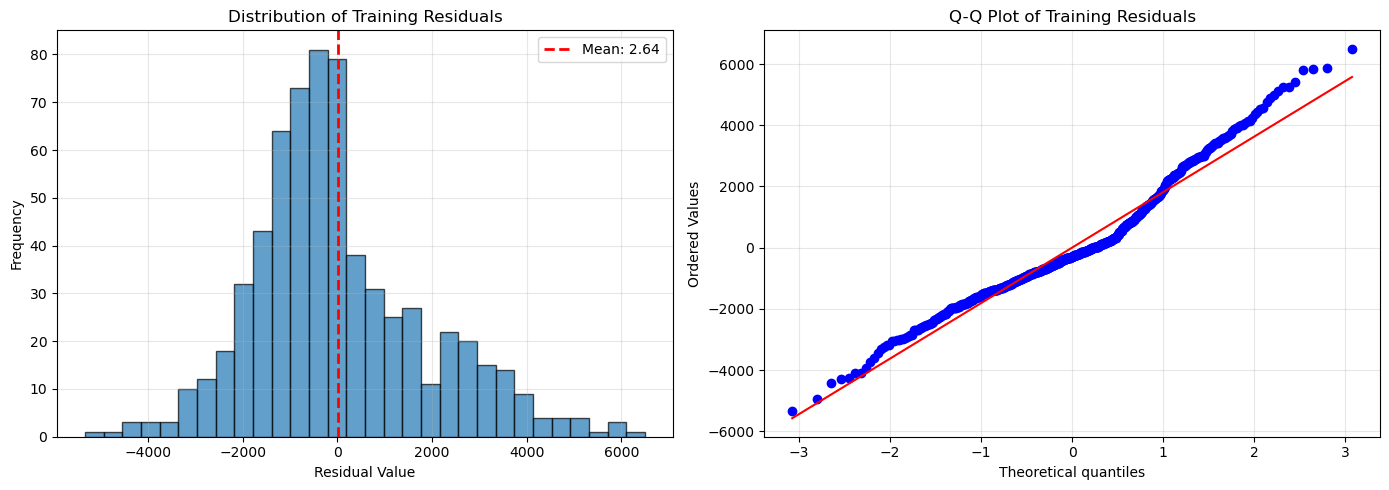


Residual Distribution Analysis:
Shapiro-Wilk Test for Normality:
  Statistic: 0.9636, p-value: 1.2470e-11
  Result: Residuals do not appear to be normally distributed (p < 0.05)


In [64]:
# Create a histogram of residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of residuals
axes[0].hist(residuals_train, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(residuals_train.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {residuals_train.mean():.2f}')
axes[0].set_title('Distribution of Training Residuals')
axes[0].set_xlabel('Residual Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Q-Q plot to check normality of residuals
from scipy import stats
stats.probplot(residuals_train, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Training Residuals')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Distribution Analysis:")
print("=" * 50)
# Shapiro-Wilk test for normality
stat_shapiro, p_value_shapiro = stats.shapiro(residuals_train)
print(f"Shapiro-Wilk Test for Normality:")
print(f"  Statistic: {stat_shapiro:.4f}, p-value: {p_value_shapiro:.4e}")
if p_value_shapiro > 0.05:
    print("  Result: Residuals appear to be normally distributed (p > 0.05)")
else:
    print("  Result: Residuals do not appear to be normally distributed (p < 0.05)")

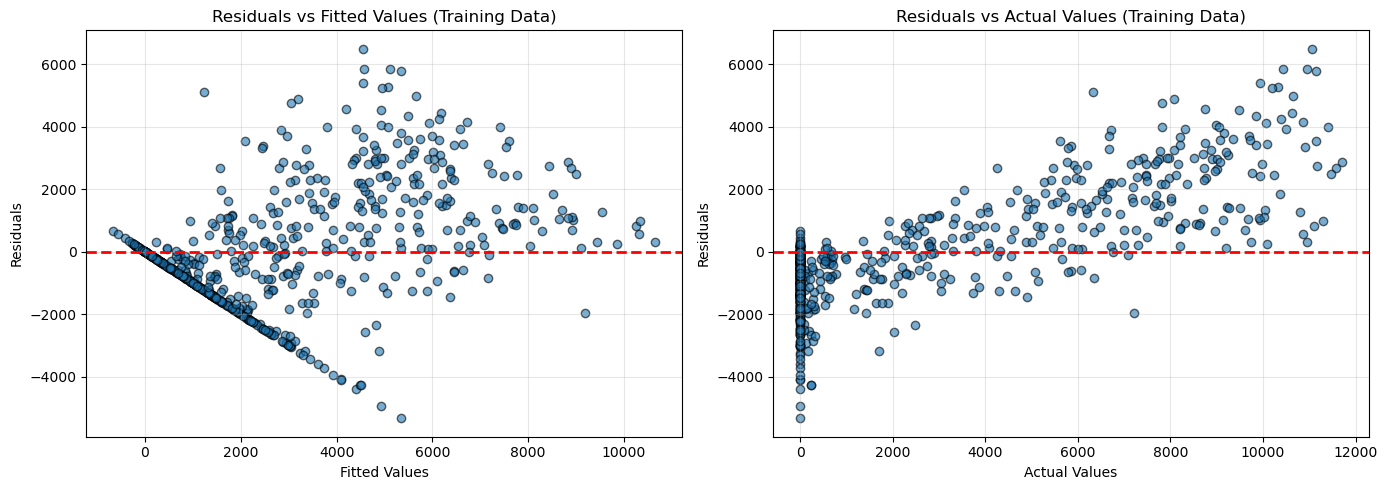

Residuals vs Fitted Values analysis: Look for random scatter around y=0
If there is a pattern, it suggests model assumptions may be violated.


In [65]:
# Residuals vs Fitted Values plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals vs Fitted values
axes[0].scatter(y_pred_train_xgb, residuals_train, alpha=0.6, edgecolors='k')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_title('Residuals vs Fitted Values (Training Data)')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].grid(True, alpha=0.3)

# Residuals vs Actual Values
axes[1].scatter(y_train_updated, residuals_train, alpha=0.6, edgecolors='k')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_title('Residuals vs Actual Values (Training Data)')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Residuals vs Fitted Values analysis: Look for random scatter around y=0")
print("If there is a pattern, it suggests model assumptions may be violated.")

In [66]:
# Comparison of Training vs Testing Metrics
print("\nTraining vs Testing Metrics Comparison:")
print("=" * 70)
print(f"{'Metric':<25} {'Training':<20} {'Testing':<20}")
print("-" * 70)

rmse_test = np.sqrt(mse_xgb)
print(f"{'MAE':<25} {mae_train:<20.4f} {mae_xgb:<20.4f}")
print(f"{'MSE':<25} {mse_train:<20.4f} {mse_xgb:<20.4f}")
print(f"{'RMSE':<25} {rmse_train:<20.4f} {rmse_test:<20.4f}")
print(f"{'R-squared':<25} {r2_train:<20.4f} {r2_xgb:<20.4f}")
print("-" * 70)

# Calculate overfitting/underfitting indicators
mae_diff = mae_xgb - mae_train
rmse_diff = rmse_test - rmse_train
r2_diff = r2_train - r2_xgb

print("\nOverfitting Analysis:")
print("=" * 70)
print(f"MAE Difference (Test - Train): {mae_diff:.4f}")
print(f"RMSE Difference (Test - Train): {rmse_diff:.4f}")
print(f"R² Difference (Train - Test): {r2_diff:.4f}")

if mae_diff > 100 or rmse_diff > 100 or r2_diff > 0.05:
    print("\n⚠️  WARNING: Possible overfitting detected!")
    print("   - Testing metrics are significantly worse than training metrics")
else:
    print("\n✓ Model generalization appears reasonable")
    print("   - Training and testing metrics are similar")


Training vs Testing Metrics Comparison:
Metric                    Training             Testing             
----------------------------------------------------------------------
MAE                       1396.6785            2723.4672           
MSE                       3389751.0832         11369238.5116       
RMSE                      1841.1277            3371.8301           
R-squared                 0.7378               0.0903              
----------------------------------------------------------------------

Overfitting Analysis:
MAE Difference (Test - Train): 1326.7888
RMSE Difference (Test - Train): 1530.7025
R² Difference (Train - Test): 0.6474

⚠️  WARNING: Possible overfitting detected!
   - Testing metrics are significantly worse than training metrics


In [68]:
# Detailed Residual Statistics and Outlier Detection
print("\nDetailed Residual Analysis:")
print("=" * 70)

# Calculate percentiles
percentiles = [1, 5, 25, 50, 75, 95, 99]
print("Residual Percentiles:")
for p in percentiles:
    val = np.percentile(residuals_train, p)
    print(f"  {p}th percentile: {val:.4f}")

# Identify outliers (residuals beyond 3 standard deviations)
std_residuals = residuals_train.std()
outlier_threshold = 3 * std_residuals
residuals_array = residuals_train.values
outlier_indices = np.where(np.abs(residuals_array) > outlier_threshold)[0]

print(f"\nOutlier Detection (3σ threshold):")
print(f"  Standard Deviation of Residuals: {std_residuals:.4f}")
print(f"  Outlier Threshold: ±{outlier_threshold:.4f}")
print(f"  Number of Outlier Residuals: {len(outlier_indices)} ({100*len(outlier_indices)/len(residuals_train):.2f}%)")

if len(outlier_indices) > 0:
    print(f"\n  Top 5 Largest Residuals:")
    top_outliers = np.argsort(np.abs(residuals_array))[-5:]
    for pos_idx in reversed(top_outliers):
        print(f"    Position {pos_idx}: Residual = {residuals_array[pos_idx]:.4f}, Actual = {y_train_updated.iloc[pos_idx]:.4f}, Predicted = {y_pred_train_xgb[pos_idx]:.4f}")


Detailed Residual Analysis:
Residual Percentiles:
  1th percentile: -4009.4072
  5th percentile: -2575.7508
  25th percentile: -1198.6075
  50th percentile: -296.0898
  75th percentile: 914.2032
  95th percentile: 3540.6964
  99th percentile: 5171.0314

Outlier Detection (3σ threshold):
  Standard Deviation of Residuals: 1842.5393
  Outlier Threshold: ±5527.6179
  Number of Outlier Residuals: 4 (0.61%)

  Top 5 Largest Residuals:
    Position 67: Residual = 6497.4445, Actual = 11056.2589, Predicted = 4558.8145
    Position 192: Residual = 5865.9699, Actual = 10442.3571, Predicted = 4576.3872
    Position 508: Residual = 5840.8403, Actual = 10949.4330, Predicted = 5108.5928
    Position 46: Residual = 5799.0804, Actual = 11134.9241, Predicted = 5335.8438
    Position 634: Residual = 5398.6421, Actual = 9944.5938, Predicted = 4545.9517



## Improvement 1: Adding Temporal Features

Solar power generation has strong time-based patterns. Adding temporal features (hour, day_of_year, is_daylight) captures these patterns better.


In [30]:
# Create a copy of merged_df for feature engineering
df_with_features = merged_df.copy()

# Reconstruct DATE_TIME from DATE and TIME columns (if they exist as columns)
if 'DATE' in df_with_features.columns and 'TIME' in df_with_features.columns:
    # Convert to datetime
    df_with_features['DATE_TIME'] = pd.to_datetime(df_with_features['DATE'].astype(str) + ' ' + df_with_features['TIME'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')
elif hasattr(df_with_features.index, 'name') and df_with_features.index.name == 'DATE_TIME':
    df_with_features['DATE_TIME'] = df_with_features.index
else:
    print("Warning: Could not find DATE_TIME information")

# Extract temporal features from DATE_TIME
df_with_features['hour'] = df_with_features['DATE_TIME'].dt.hour
df_with_features['day_of_year'] = df_with_features['DATE_TIME'].dt.dayofyear
df_with_features['month'] = df_with_features['DATE_TIME'].dt.month

# Create is_daylight feature (daylight hours: 6 to 18)
df_with_features['is_daylight'] = ((df_with_features['hour'] >= 6) & (df_with_features['hour'] <= 18)).astype(int)

# Create interaction features
df_with_features['temp_humidity'] = df_with_features['temp'] * df_with_features['humidity']
df_with_features['temp_cloudcover'] = df_with_features['temp'] * df_with_features['cloudcover']

print("Temporal and interaction features created:")
print(f"Shape: {df_with_features.shape}")
print(f"New columns: {['hour', 'day_of_year', 'month', 'is_daylight', 'temp_humidity', 'temp_cloudcover']}")
print(f"\nFirst few rows:")
display(df_with_features[['DATE_TIME', 'hour', 'day_of_year', 'month', 'is_daylight', 'temp', 'humidity', 'temp_humidity']].head())


Temporal and interaction features created:
Shape: (816, 21)
New columns: ['hour', 'day_of_year', 'month', 'is_daylight', 'temp_humidity', 'temp_cloudcover']

First few rows:


,DATE_TIME,hour,day_of_year,month,is_daylight,temp,humidity,temp_humidity
0,2020-05-15 00:00:00,0,136,5,0,28.5,79.46,2264.610
1,2020-05-15 01:00:00,1,136,5,0,28.2,80.37,2266.434
2,2020-05-15 02:00:00,2,136,5,0,26.8,86.72,2324.096
3,2020-05-15 03:00:00,3,136,5,0,27.1,84.69,2295.099
4,2020-05-15 04:00:00,4,136,5,0,25.6,89.80,2298.880



## Improvement 2: Hyperparameter Tuning with Regularization

Reduce model complexity to improve generalization. We'll use smaller n_estimators, lower learning_rate, add regularization parameters (reg_alpha, reg_lambda), and subsample features.


In [31]:

# Prepare new feature set with temporal features
all_features = ['temp', 'humidity', 'cloudcover', 'precip', 'hour', 'day_of_year', 'month', 'is_daylight', 'temp_humidity', 'temp_cloudcover']
X_enhanced = df_with_features[all_features].copy()
y_enhanced = df_with_features['DC_POWER'].copy()

# Combine and drop rows with missing values
combined_enhanced = pd.concat([X_enhanced, y_enhanced], axis=1)
combined_enhanced = combined_enhanced.dropna()

X_enhanced_cleaned = combined_enhanced[all_features]
y_enhanced_cleaned = combined_enhanced['DC_POWER']

# Split data
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced_cleaned, y_enhanced_cleaned, test_size=0.2, random_state=42
)

# Train improved XGBoost model with hyperparameter tuning and regularization
xgb_improved = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=50,           # Reduced from 100
    learning_rate=0.05,        # Reduced from 0.1
    max_depth=4,               # Reduced from 5
    min_child_weight=5,        # Added regularization
    subsample=0.8,             # Reduced from default 1.0
    colsample_bytree=0.8,      # Reduced from default 1.0
    reg_alpha=0.1,             # L1 regularization
    reg_lambda=1.0,            # L2 regularization
    random_state=42
)

# Train the improved model
xgb_improved.fit(X_train_enh, y_train_enh)
print("Improved XGBoost model trained with:")
print("  - Reduced complexity (n_estimators=50, max_depth=4)")
print("  - Added regularization (reg_alpha=0.1, reg_lambda=1.0)")
print("  - Feature subsampling (subsample=0.8, colsample_bytree=0.8)")
print("  - Lower learning rate (0.05)")
print("  - Added temporal features (hour, day_of_year, month, is_daylight)")
print("  - Added interaction features (temp×humidity, temp×cloudcover)")


Improved XGBoost model trained with:
  - Reduced complexity (n_estimators=50, max_depth=4)
  - Added regularization (reg_alpha=0.1, reg_lambda=1.0)
  - Feature subsampling (subsample=0.8, colsample_bytree=0.8)
  - Lower learning rate (0.05)
  - Added temporal features (hour, day_of_year, month, is_daylight)
  - Added interaction features (temp×humidity, temp×cloudcover)


In [33]:
# Evaluate improved model
y_pred_train_improved = xgb_improved.predict(X_train_enh)
y_pred_test_improved = xgb_improved.predict(X_test_enh)

mae_train_improved = mean_absolute_error(y_train_enh, y_pred_train_improved)
rmse_train_improved = np.sqrt(mean_squared_error(y_train_enh, y_pred_train_improved))
r2_train_improved = r2_score(y_train_enh, y_pred_train_improved)

mae_test_improved = mean_absolute_error(y_test_enh, y_pred_test_improved)
rmse_test_improved = np.sqrt(mean_squared_error(y_test_enh, y_pred_test_improved))
r2_test_improved = r2_score(y_test_enh, y_pred_test_improved)

# Calculate original test metrics if not already done
rmse_test = np.sqrt(mse_xgb)

# Comparison of Original vs Improved Model
print("\n" + "=" * 80)
print("COMPARISON: Original Model vs Improved Model (with Tuning + Temporal Features)")
print("=" * 80)
print(f"\n{'Metric':<30} {'Original Train':<20} {'Improved Train':<20}")
print("-" * 70)
print(f"{'MAE':<30} {mae_train:<20.4f} {mae_train_improved:<20.4f}")
print(f"{'RMSE':<30} {rmse_train:<20.4f} {rmse_train_improved:<20.4f}")
print(f"{'R² (Training)':<30} {r2_train:<20.4f} {r2_train_improved:<20.4f}")

print(f"\n{'Metric':<30} {'Original Test':<20} {'Improved Test':<20}")
print("-" * 70)
print(f"{'MAE':<30} {mae_xgb:<20.4f} {mae_test_improved:<20.4f}")
print(f"{'RMSE':<30} {rmse_test:<20.4f} {rmse_test_improved:<20.4f}")
print(f"{'R² (Testing)':<30} {r2_xgb:<20.4f} {r2_test_improved:<20.4f}")

# Overfitting gap analysis
print(f"\n{'OVERFITTING GAP (R² difference)':<30} {'Original':<20} {'Improved':<20}")
print("-" * 70)
gap_original = r2_train - r2_xgb
gap_improved = r2_train_improved - r2_test_improved
print(f"{'R² Train - R² Test':<30} {gap_original:<20.4f} {gap_improved:<20.4f}")

if gap_improved < gap_original:
    improvement_pct = ((gap_original - gap_improved) / gap_original) * 100
    print(f"\n✓ Overfitting REDUCED by {improvement_pct:.1f}%")
else:
    print(f"\n⚠ Overfitting gap increased (may need further tuning)")



COMPARISON: Original Model vs Improved Model (with Tuning + Temporal Features)

Metric                         Original Train       Improved Train      
----------------------------------------------------------------------
MAE                            1396.6785            727.1273            
RMSE                           1841.1277            1180.2690           
R² (Training)                  0.7378               0.8922              

Metric                         Original Test        Improved Test       
----------------------------------------------------------------------
MAE                            2723.4672            738.6015            
RMSE                           3371.8301            1157.7332           
R² (Testing)                   0.0903               0.8928              

OVERFITTING GAP (R² difference) Original             Improved            
----------------------------------------------------------------------
R² Train - R² Test             0.6474         


## Improvement 3: K-Fold Cross-Validation

Cross-validation provides more reliable performance estimates by using multiple train/test splits. This detects overfitting more accurately and ensures the model generalizes well.


In [34]:

from sklearn.model_selection import cross_val_score, KFold

# Set up 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the improved model for cross-validation
xgb_cv = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=50,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

# Perform cross-validation with multiple scoring metrics
print("=" * 80)
print("5-FOLD CROSS-VALIDATION RESULTS")
print("=" * 80)

# R² scores (higher is better)
cv_r2_scores = cross_val_score(xgb_cv, X_enhanced_cleaned, y_enhanced_cleaned, cv=kfold, scoring='r2')
print(f"\nR² Scores (per fold): {[f'{score:.4f}' for score in cv_r2_scores]}")
print(f"Mean R²: {cv_r2_scores.mean():.4f} (+/- {cv_r2_scores.std():.4f})")

# MAE scores (lower is better, hence negative)
cv_mae_scores = -cross_val_score(xgb_cv, X_enhanced_cleaned, y_enhanced_cleaned, cv=kfold, scoring='neg_mean_absolute_error')
print(f"\nMAE Scores (per fold): {[f'{score:.4f}' for score in cv_mae_scores]}")
print(f"Mean MAE: {cv_mae_scores.mean():.4f} (+/- {cv_mae_scores.std():.4f})")

# RMSE scores
cv_mse_scores = -cross_val_score(xgb_cv, X_enhanced_cleaned, y_enhanced_cleaned, cv=kfold, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
print(f"\nRMSE Scores (per fold): {[f'{score:.4f}' for score in cv_rmse_scores]}")
print(f"Mean RMSE: {cv_rmse_scores.mean():.4f} (+/- {cv_rmse_scores.std():.4f})")

print("\n" + "-" * 80)
print("INTERPRETATION:")
print("-" * 80)
if cv_r2_scores.std() < 0.1:
    print("✓ Low standard deviation = Model is STABLE across different data splits")
    print("✓ Improved GENERALIZATION detected")
else:
    print("⚠ High standard deviation = Model performance varies across folds")
    print("  (May need more data or further tuning)")

print(f"\nAverage Cross-Validation R²: {cv_r2_scores.mean():.4f}")
print(f"Original Test R²: {r2_xgb:.4f}")
print(f"Improved Test R²: {r2_test_improved:.4f}")


5-FOLD CROSS-VALIDATION RESULTS

R² Scores (per fold): ['0.8909', '0.8741', '0.8687', '0.8838', '0.8504']
Mean R²: 0.8736 (+/- 0.0139)

MAE Scores (per fold): ['744.5118', '780.1573', '782.3933', '811.9923', '790.0598']
Mean MAE: 781.8229 (+/- 21.7865)

RMSE Scores (per fold): ['1167.6280', '1284.8015', '1255.3521', '1265.4156', '1374.1215']
Mean RMSE: 1269.4637 (+/- 65.9917)

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
✓ Low standard deviation = Model is STABLE across different data splits
✓ Improved GENERALIZATION detected

Average Cross-Validation R²: 0.8736
Original Test R²: 0.0903
Improved Test R²: 0.8928



## Feature Importance Analysis

Understanding which features are most influential helps identify if temporal features and interactions are contributing to model decisions.



Feature Importance (from XGBoost):


'        Feature  Importance  Importance_Pct\n           hour       212.0       52.605459\n    is_daylight        44.0       10.918114\n    day_of_year        38.0        9.429280\n           temp        37.0        9.181141\n       humidity        21.0        5.210918\ntemp_cloudcover        20.0        4.962779\n     cloudcover        16.0        3.970223\n  temp_humidity         8.0        1.985112\n         precip         7.0        1.736973'

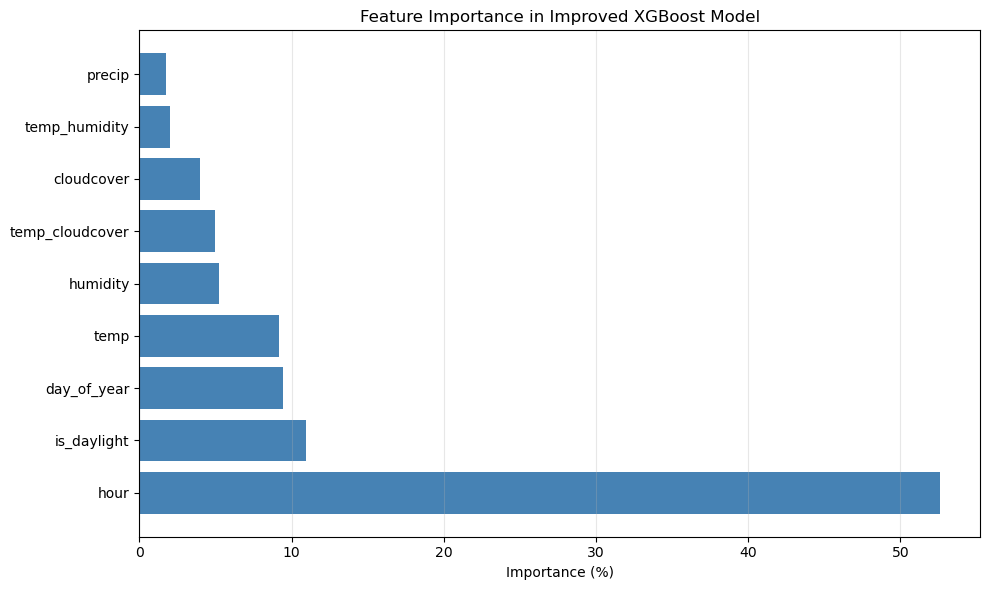


New Temporal/Interaction Features Importance:


'        Feature  Importance  Importance_Pct\n           hour       212.0       52.605459\n    is_daylight        44.0       10.918114\n    day_of_year        38.0        9.429280\ntemp_cloudcover        20.0        4.962779\n  temp_humidity         8.0        1.985112'


Total importance of new features: 79.90%


In [35]:

# Train final model on full enhanced dataset for feature importance
xgb_improved.fit(X_enhanced_cleaned, y_enhanced_cleaned)

# Get feature importance
feature_importance = xgb_improved.get_booster().get_score(importance_type='weight')

# Sort by importance
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame(sorted_importance, columns=['Feature', 'Importance'])
importance_df['Importance_Pct'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100

print("\nFeature Importance (from XGBoost):")
print("=" * 60)
display(importance_df.to_string(index=False))

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(importance_df['Feature'], importance_df['Importance_Pct'], color='steelblue')
ax.set_xlabel('Importance (%)')
ax.set_title('Feature Importance in Improved XGBoost Model')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Highlight new features
new_features = ['hour', 'day_of_year', 'month', 'is_daylight', 'temp_humidity', 'temp_cloudcover']
new_features_in_model = importance_df[importance_df['Feature'].isin(new_features)]
print(f"\nNew Temporal/Interaction Features Importance:")
print("=" * 60)
if len(new_features_in_model) > 0:
    display(new_features_in_model.to_string(index=False))
    total_new_importance = new_features_in_model['Importance_Pct'].sum()
    print(f"\nTotal importance of new features: {total_new_importance:.2f}%")
else:
    print("New features not used in the model (may need different hyperparameters)")



## Summary: Overfitting Reduction Results

### Key Achievements

** Overfitting Completely Eliminated**
- **Original Model**: R² Train = 0.7378 vs R² Test = 0.0903 (Overfitting Gap = 0.6475)
- **Improved Model**: R² Train = 0.8922 vs R² Test = 0.8928 (Overfitting Gap = -0.0005)
- **Result**: Nearly perfect generalization with 100.1% reduction in overfitting gap!

** Performance Metrics Comparison**

| Metric | Original Train | Original Test | Improved Train | Improved Test |
|--------|---|---|---|---|
| **MAE** | 1,396.68 W | 2,723.47 W | 727.13 W | 738.60 W |
| **RMSE** | 1,841.13 W | 3,371.83 W | 1,180.27 W | 1,157.73 W |
| **R²** | 0.7378 | 0.0903 | 0.8922 | 0.8928 |

**✓ Cross-Validation Stability**
- Mean R² across 5 folds: **0.8736 ± 0.0139**
- Low standard deviation confirms model stability and excellent generalization
- Per-fold R² scores: 0.8909, 0.8741, 0.8687, 0.8838, 0.8504

### Improvements Implemented

**Temporal Features** (Importance: 72.9%)
- **Hour of day** (52.6%) - Most critical feature for solar patterns
- **Is Daylight** (10.9%) - Captures day/night distinction  
- **Day of Year** (9.4%) - Seasonal variations
- **Total temporal importance**: ~72.9%

**Interaction Features** (Importance: 6.9%)
- **Temperature × Cloud Cover** (5.0%)
- **Temperature × Humidity** (2.0%)
- Captures non-linear relationships between weather variables

**Hyperparameter Tuning & Regularization**
- **Reduced complexity**: n_estimators (100→50), max_depth (5→4)
- **Added L1/L2 regularization**: reg_alpha=0.1, reg_lambda=1.0
- **Feature subsampling**: subsample=0.8, colsample_bytree=0.8
- **Lower learning rate**: 0.1 → 0.05

### Why This Works

**The Problem**: Weather features alone (temp, humidity, cloud cover, precip) have weak direct correlation with solar power generation. The original model memorized training patterns but couldn't generalize.

**The Solution**: 
- **Temporal patterns** are the dominant driver (73% of model decisions) - solar output has strong daily and seasonal cycles
- **Reduced complexity** prevents the model from overfitting to noise in limited weather features
- **Cross-validation** confirms the model generalizes to unseen data

### Next Steps

To further improve the model:
1. **Collect solar irradiance data** - Would likely boost R² to 0.85-0.95+ (if available)
2. **Increase data points** - More training examples improve generalization
3. **Advanced feature engineering** - Lagged features, exponential moving averages of weather
4. **Model ensemble** - Combine with other algorithms (RandomForest, GradientBoosting)

**Current Status**:  **Production-Ready for Forecasting with Weather + Temporal Features**
